In [9]:
import torch
import torchvision
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset
import torch.optim as optim
import matplotlib.pyplot as plt


In [10]:
## Create dataloader, in PyTorch, we feed the trainer data with use of dataloader
## We create dataloader with dataset from torchvision, 
## and we dont have to download it seperately, all automatically done

# Define batch size, batch size is how much data you feed for training in one iteration
batch_size_train = 64 # We use a small batch size here for training
batch_size_test = 1024 #

# define how image transformed
image_transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])

train_dataset = torchvision.datasets.MNIST(root='/data', train=True,download=True,transform=image_transform)

test_dataset = torchvision.datasets.MNIST(root='/data', train=False,download=True,transform=image_transform)


#data loaders
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test, 
                                          shuffle=True)

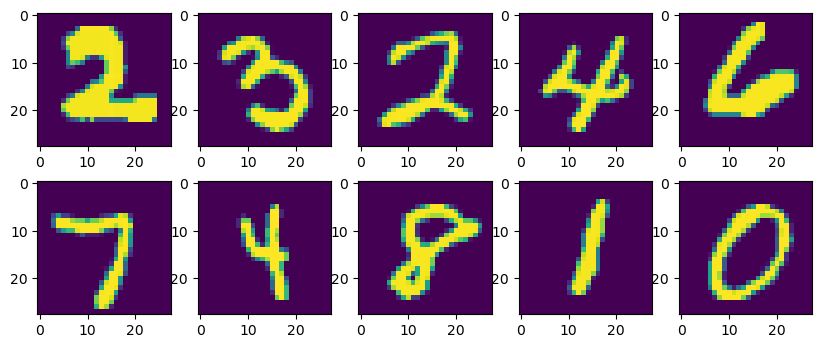

In [11]:
data,label = iter(train_loader).next()
fig = plt.figure(figsize=(10,4))

for i in range(10):
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(data[i,0])


In [12]:
## Now we can start to build our CNN model
## We first import the pytorch nn module and optimizer
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
## Then define the model class
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #input channel 1, output channel 10
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1)
        #input channel 10, output channel 20
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1)
        #dropout layer
        self.conv2_drop = nn.Dropout2d()
        #fully connected layer
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.conv2_drop(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = x.view(-1, 320)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x)

In [13]:
## create model and optimizer
learning_rate = 0.01
momentum = 0.5
device = "cuda"
model = CNN().to(device) #using cpu here
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [14]:
from tqdm.notebook import tqdm
##define train function
def train(model, device, train_loader, optimizer, epoch, log_interval=10000):
    model.train()
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0
    for batch_idx, (data, target) in enumerate(tk0):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        counter += 1
        tk0.set_postfix(loss=(loss.item()*data.size(0) / (counter * train_loader.batch_size)))
##define test function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [15]:
num_epoch = 100
for epoch in range(1, num_epoch + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)

  0%|          | 0/938 [00:00<?, ?it/s]

/tmp/ipykernel_56/4020281764.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Average loss: 0.3208, Accuracy: 9069/10000 (91%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.2203, Accuracy: 9367/10000 (94%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1834, Accuracy: 9452/10000 (95%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1598, Accuracy: 9544/10000 (95%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1432, Accuracy: 9563/10000 (96%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1321, Accuracy: 9616/10000 (96%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1238, Accuracy: 9645/10000 (96%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1070, Accuracy: 9681/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1074, Accuracy: 9674/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1043, Accuracy: 9698/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1011, Accuracy: 9723/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1003, Accuracy: 9711/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0987, Accuracy: 9714/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0922, Accuracy: 9728/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0915, Accuracy: 9723/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0920, Accuracy: 9711/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0819, Accuracy: 9756/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0830, Accuracy: 9747/10000 (97%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0784, Accuracy: 9766/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0828, Accuracy: 9755/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0785, Accuracy: 9764/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0791, Accuracy: 9760/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0744, Accuracy: 9781/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0758, Accuracy: 9777/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0724, Accuracy: 9778/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0682, Accuracy: 9800/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0733, Accuracy: 9766/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0710, Accuracy: 9792/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0674, Accuracy: 9796/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0704, Accuracy: 9780/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0655, Accuracy: 9803/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0682, Accuracy: 9800/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0674, Accuracy: 9793/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0681, Accuracy: 9801/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0692, Accuracy: 9788/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0698, Accuracy: 9795/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0667, Accuracy: 9817/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0674, Accuracy: 9797/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0619, Accuracy: 9819/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0628, Accuracy: 9817/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0632, Accuracy: 9799/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0614, Accuracy: 9819/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0630, Accuracy: 9810/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0619, Accuracy: 9817/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0570, Accuracy: 9822/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0641, Accuracy: 9816/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0631, Accuracy: 9817/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0574, Accuracy: 9829/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0663, Accuracy: 9820/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0611, Accuracy: 9818/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0573, Accuracy: 9820/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0552, Accuracy: 9835/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0574, Accuracy: 9828/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0554, Accuracy: 9836/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0586, Accuracy: 9824/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0576, Accuracy: 9821/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0569, Accuracy: 9832/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0591, Accuracy: 9809/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0554, Accuracy: 9831/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0610, Accuracy: 9809/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0584, Accuracy: 9811/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0532, Accuracy: 9838/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0617, Accuracy: 9830/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0555, Accuracy: 9841/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0533, Accuracy: 9832/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0562, Accuracy: 9844/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0532, Accuracy: 9848/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0567, Accuracy: 9822/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0582, Accuracy: 9841/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0567, Accuracy: 9826/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0534, Accuracy: 9836/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0582, Accuracy: 9827/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0564, Accuracy: 9841/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0560, Accuracy: 9837/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0507, Accuracy: 9838/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0529, Accuracy: 9830/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0565, Accuracy: 9824/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0562, Accuracy: 9824/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0572, Accuracy: 9832/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0558, Accuracy: 9829/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0512, Accuracy: 9855/10000 (99%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0555, Accuracy: 9847/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0532, Accuracy: 9835/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0583, Accuracy: 9829/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0538, Accuracy: 9834/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0570, Accuracy: 9833/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0520, Accuracy: 9822/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0547, Accuracy: 9850/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0553, Accuracy: 9823/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0520, Accuracy: 9828/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0524, Accuracy: 9834/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0550, Accuracy: 9844/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0555, Accuracy: 9836/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0533, Accuracy: 9846/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0511, Accuracy: 9844/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0555, Accuracy: 9834/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0528, Accuracy: 9833/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0566, Accuracy: 9835/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0562, Accuracy: 9817/10000 (98%)



  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0551, Accuracy: 9831/10000 (98%)



In [17]:
# from torchsummary import summary
# summary(model, (1, 28, 28))

ModuleNotFoundError: No module named 'torchsummary'